In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from Agents import *
folder = '/Users/moyuanchen/Documents/thesis/sim_0/'

In [2]:
filename = [n for n in os.listdir(folder) if n.startswith('data')]
filename = sorted(filename, key=lambda x: int(x[10:-4]))

In [3]:

data = np.load(folder+filename[-1], allow_pickle=True).item()

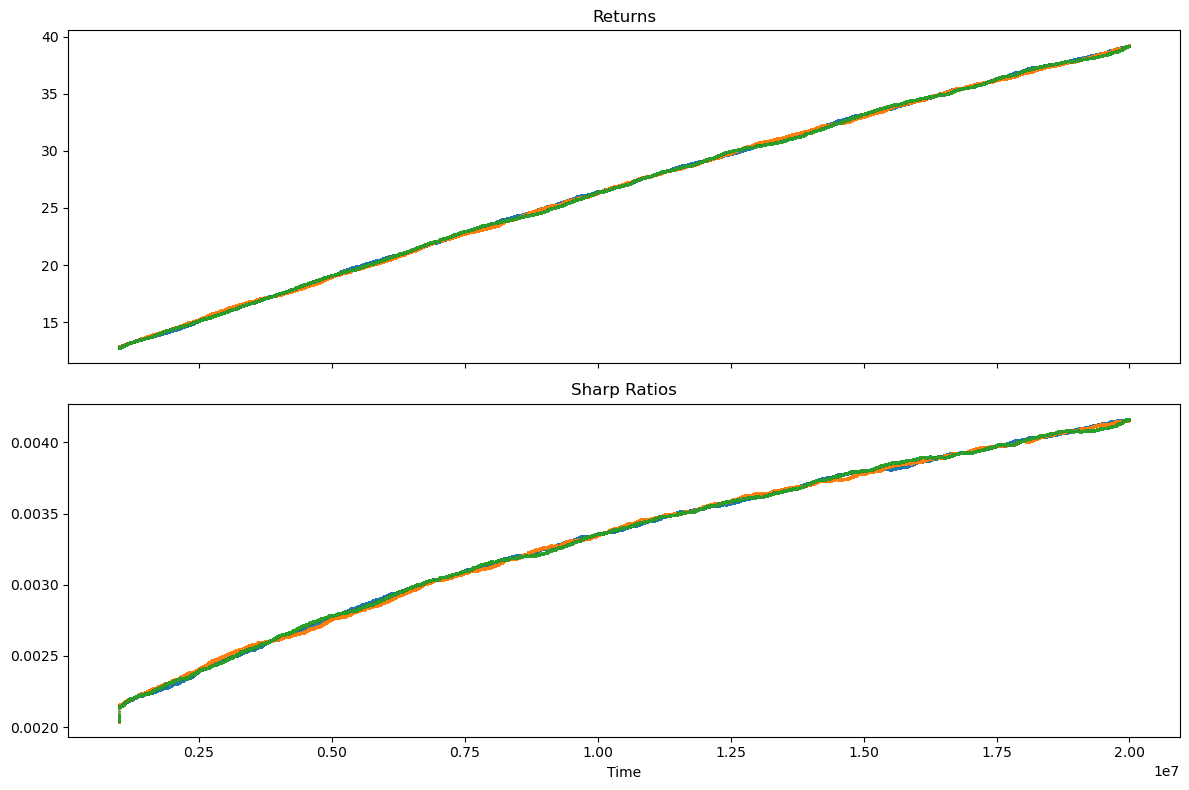

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
window_size = 1000000
for i in range(3):
    profit_series = pd.Series(profit[i])
    returns = profit_series
    returns_mean = returns.rolling(window=window_size).mean()
    profit_var = profit_series.rolling(window=window_size).var()
    sharp_ratio = returns_mean / profit_var
    
    axes[0].plot(returns_mean, '.', markersize=0.5, label=f'Returns {i}')
    axes[1].plot(sharp_ratio, '.', markersize=0.5, label=f'Sharp Ratio {i}')

axes[0].set_title('Returns')
axes[1].set_title('Sharp Ratios')
# axes[0].legend()
# axes[1].legend()
plt.xlabel('Time')
plt.tight_layout()
plt.show()